In [136]:
import scipy.ndimage
import skimage.color
import skimage.io
import skimage.transform
from matplotlib import pyplot as plt
import numpy as np


def find_extrema(lower, middle, upper, h, w):
    extrema_points = np.zeros([h, w])
   
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            center_pixel_value = middle[i,j]
            first_subimage = lower[i-1:i+2, j-1:j+2]
            second_subimage = middle[i-1:i+2, j-1:j+2]
            third_subimage = upper[i-1:i+2, j-1:j+2]
            second_subimage[1,1] = center_pixel_value - 1
            if abs(center_pixel_value) > 0.3:
                if center_pixel_value > 0:
                    if np.all(center_pixel_value >= first_subimage) and \
                       np.all(center_pixel_value >= third_subimage) and \
                       np.all(center_pixel_value >= second_subimage[0, :]) and \
                       np.all(center_pixel_value >= second_subimage[2, :]) and \
                       center_pixel_value >= second_subimage[1, 0] and \
                       center_pixel_value >= second_subimage[1, 2] :
                            extrema_points[i,j] = 1
                elif center_pixel_value < 0:
                    if np.all(center_pixel_value <= first_subimage) and \
                        np.all(center_pixel_value <= third_subimage) and \
                        np.all(center_pixel_value <= second_subimage[0, :]) and \
                        np.all(center_pixel_value <= second_subimage[2, :]) and \
                        center_pixel_value <= second_subimage[1, 0] and \
                        center_pixel_value <= second_subimage[1, 2] :
                            extrema_points[i,j] = 1
                else:
                    extrema_points[i,j] = 0
            

    # some more processing to later superimpose the found extrema points on the image
    # and also make them visible after superimposing (which wouldn't be possible if they are a single pixel wide)
    extrema_points_image = np.zeros([h, w])
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            if extrema_points[i, j] == 1:
                extrema_points_image[i - 1:i + 2, j - 1:j + 2] = extrema_points_image[i - 1:i + 2, j - 1:j + 2] + 1
    extrema_points_image = extrema_points_image >= 1

    return extrema_points_image


def scale_space_extrema_points(image):
    sigma = 1.6
    s = 15  
    k = 2 ** (1 / (s - 1)) 
    gaussians = [None] * s
    fig = plt.figure(figsize=(10,10))
    for i in range(s):
        gaussians[i] = scipy.ndimage.gaussian_filter(image, sigma * (k ** i)) * 255

    DOGs = [None] * (s - 1)
    for i in range(s - 1):
        DOGs[i] = gaussians[i + 1] - gaussians[i]

    extrema_matrices = [None] * (s - 3)
    for i in range(s - 3):
        extrema_matrices[i] = find_extrema(DOGs[i].copy(), DOGs[i + 1].copy(), DOGs[i + 2].copy(), image.shape[0],
                                                        image.shape[1])

    for i in range(s - 3):
        plt.subplot(4,3, i+1)
        plt.imshow(image+extrema_matrices[i], cmap='gray')
    plt.show()
    
    h = image.shape[0]
    w = image.shape[1]
    sum = False
    for i in range(1,h):
        for j in range(1,w):
           # extrema_points_matrices[0][i][j] = extrema_points_matrices[0][i][j] or extrema_points_matrices[1][i][j]  
            for k in range(s-3):
                      #extrema_points_matrices[0][i][j] = extrema_points_matrices[0][i][j] or extrema_points_matrices[1][i][j]  
            #sum = sum or extrema_points_matrices[k][i][j]
            #if sum is True:
             #   extrema_points_matrices[0][i][j] = True
                extrema_matrices[0][i][j] = extrema_matrices[0][i][j] or extrema_matrices[k][i][j]
        
               
                
    plt.imshow(image+extrema_matrices[0], cmap='gray')
    plt.show()

C:\Users\samue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """Entry point for launching an IPython kernel.
C:\Users\samue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  


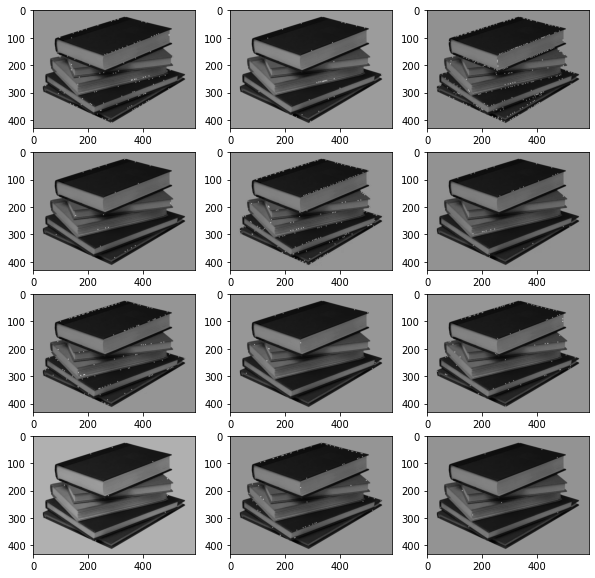

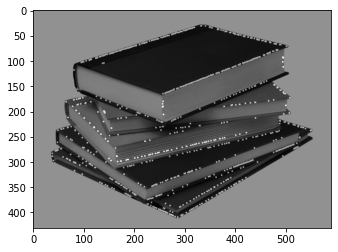

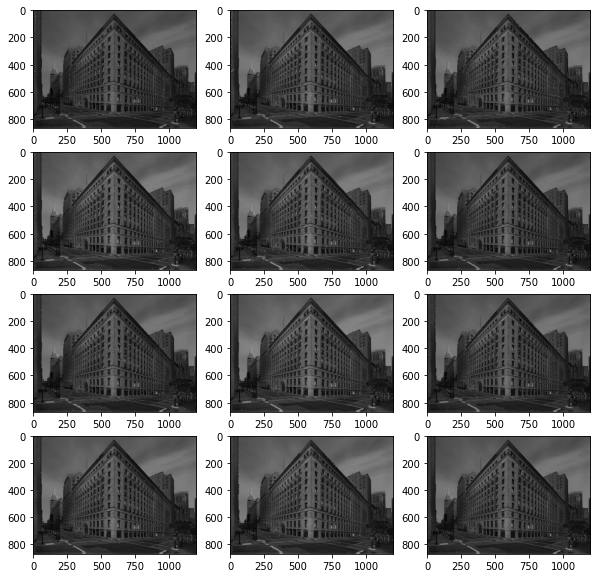

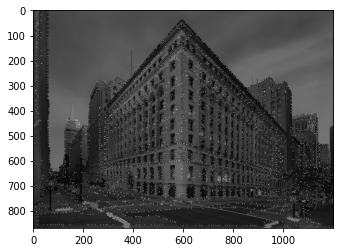

In [137]:
book_image = skimage.color.rgb2gray(skimage.io.imread('books.png'))
build_image = skimage.color.rgb2gray(skimage.io.imread('building.png'))

scale_space_extrema_points(book_image)
scale_space_extrema_points(build_image)


a.Rotation


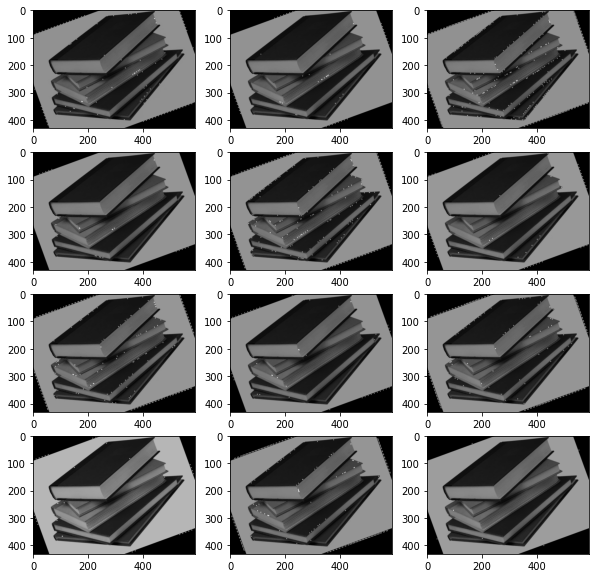

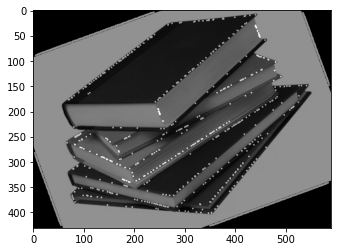

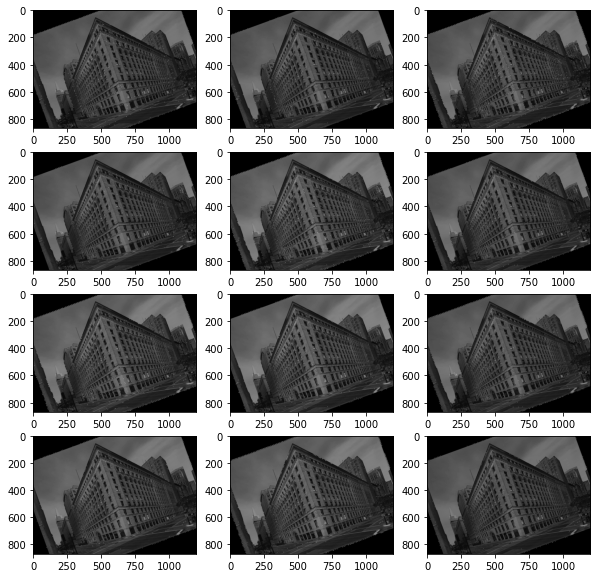

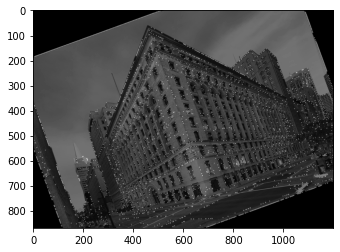

In [138]:
print("a.Rotation")

scale_space_extrema_points(skimage.transform.rotate(book_image, 20))
scale_space_extrema_points(skimage.transform.rotate(build_image, 20))

b. Downscale


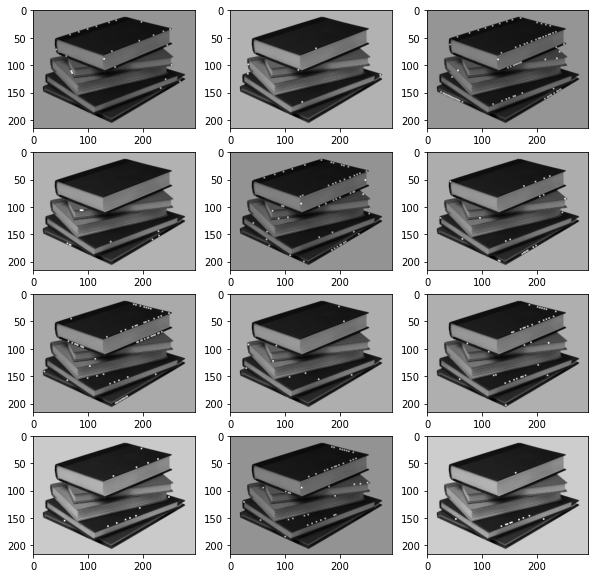

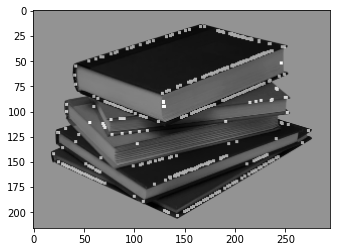

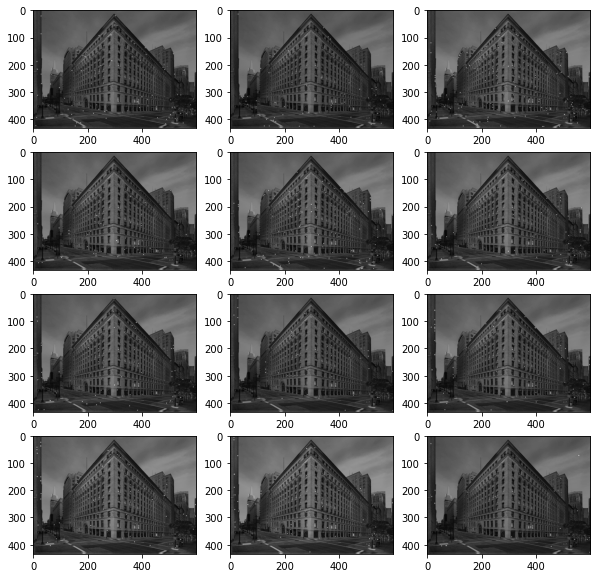

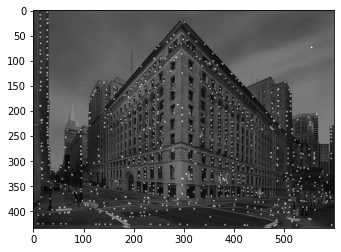

In [126]:
print("b. Downscale")

scale_space_extrema_points(skimage.transform.rescale(book_image, 0.5, anti_aliasing=False))
scale_space_extrema_points(skimage.transform.rescale(build_image, 0.5, anti_aliasing=False))

c. Upcale


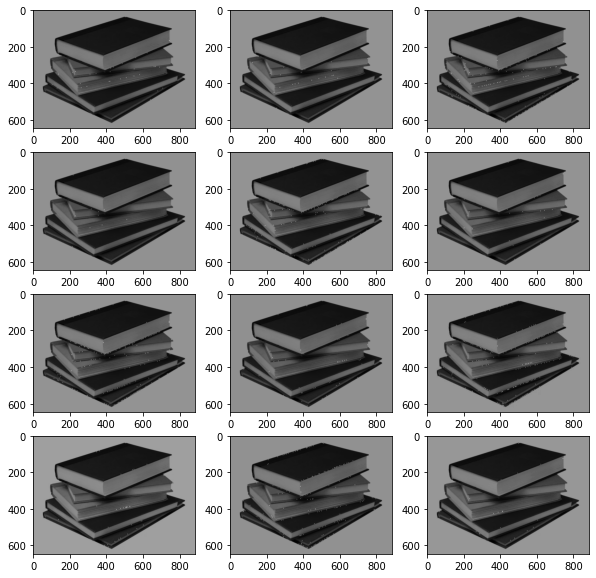

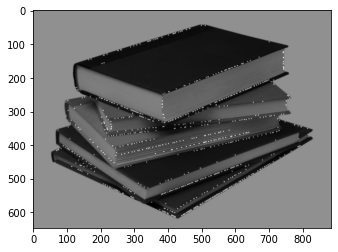

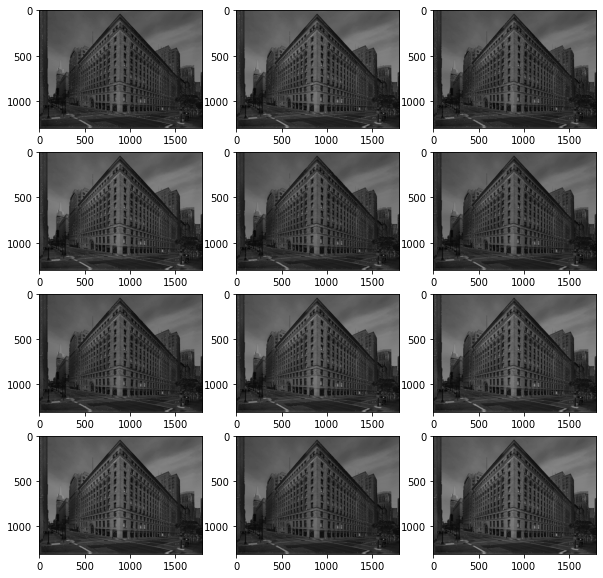

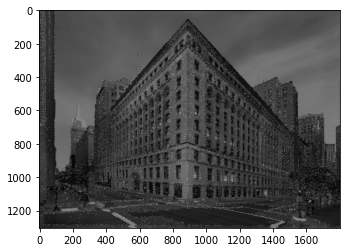

In [127]:
print("c. Upcale")

scale_space_extrema_points(skimage.transform.rescale(book_image, 1.5, anti_aliasing=False))
scale_space_extrema_points(skimage.transform.rescale(build_image, 1.5, anti_aliasing=False))

d. Gaussian Blur


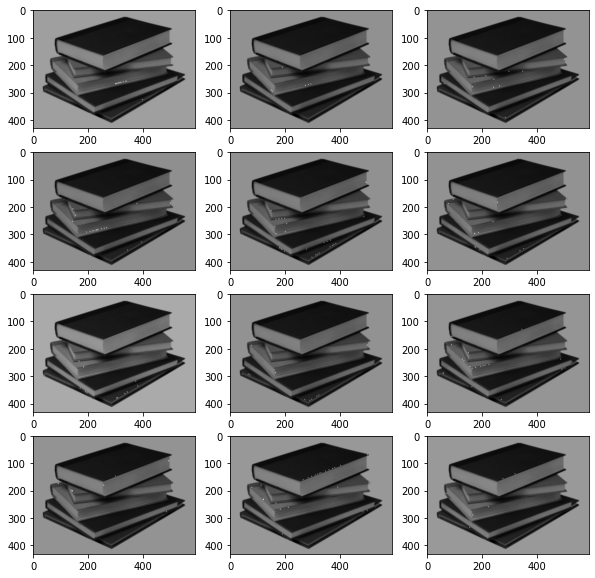

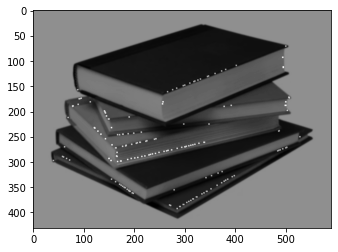

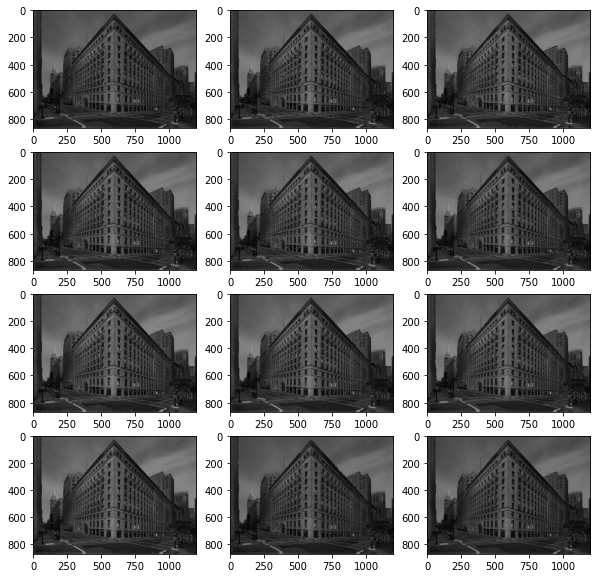

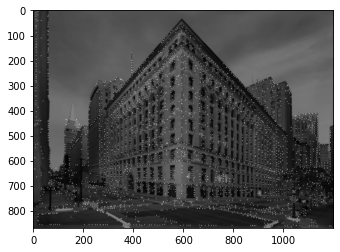

In [131]:
print("d. Gaussian Blur")

scale_space_extrema_points(scipy.ndimage.gaussian_filter(book_image, 1))
scale_space_extrema_points( scipy.ndimage.gaussian_filter(build_image, 1))

e. Gaussian Noise


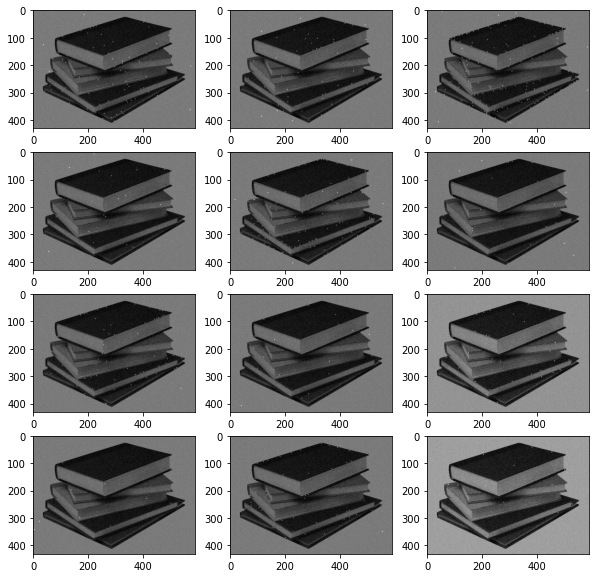

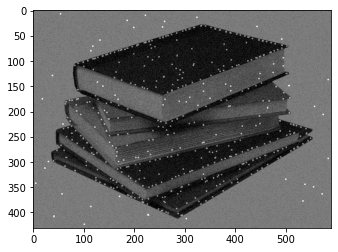

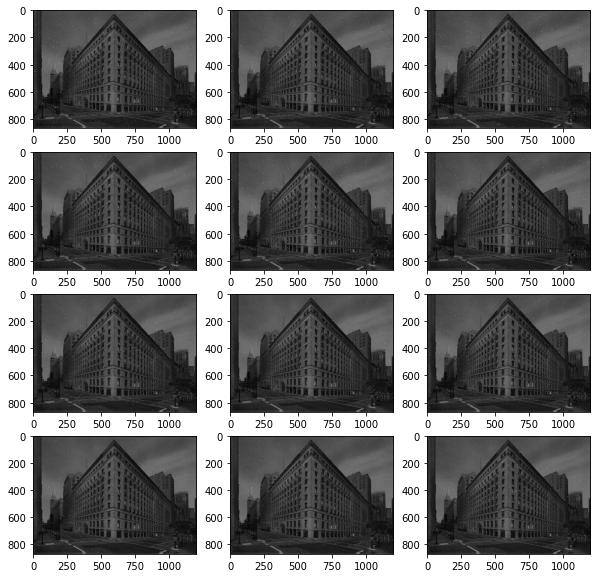

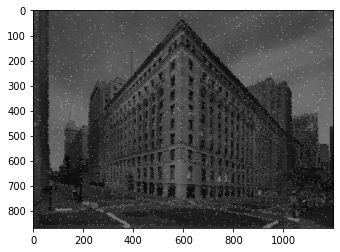

In [132]:
print("e. Gaussian Noise")
face_image_noisy = skimage.util.random_noise(book_image, mode='gaussian')
random_image_noisy = skimage.util.random_noise(build_image, mode='gaussian')
scale_space_extrema_points(skimage.util.random_noise(book_image, mode='gaussian'))
scale_space_extrema_points(skimage.util.random_noise(build_image, mode='gaussian'))

In [ ]:
  center_pixel_value = second_subimage[1, 1]
    if abs(center_pixel_value) > threshold:
        if center_pixel_value > 0:
            return all(center_pixel_value >= first_subimage) and \
                   all(center_pixel_value >= third_subimage) and \
                   all(center_pixel_value >= second_subimage[0, :]) and \
                   all(center_pixel_value >= second_subimage[2, :]) and \
                   center_pixel_value >= second_subimage[1, 0] and \
                   center_pixel_value >= second_subimage[1, 2]
        elif center_pixel_value < 0:
            return all(center_pixel_value <= first_subimage) and \
                   all(center_pixel_value <= third_subimage) and \
                   all(center_pixel_value <= second_subimage[0, :]) and \
                   all(center_pixel_value <= second_subimage[2, :]) and \
                   center_pixel_value <= second_subimage[1, 0] and \
                   center_pixel_value <= second_subimage[1, 2]
    return False


   for k in range(s-3):
                      #extrema_points_matrices[0][i][j] = extrema_points_matrices[0][i][j] or extrema_points_matrices[1][i][j]  
                    sum = sum or extrema_points_matrices[k][i][j]
            if sum is True:
                extrema_points_matrices[0][i][j] = True
    